<a href="https://colab.research.google.com/github/kibbm/ML-Tensorflow/blob/master/%EA%B3%84%EC%B8%B5%EC%A0%81Clustering_Iris_1014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hierarchical clustering을 이용한 데이타 군집화

참고site> 하기 코드 활용해 오류 수정 및 변경함.
* https://bcho.tistory.com/1204 [조대협의 블로그]
* https://github.com/bwcho75/dataanalyticsandML/blob/master/Clustering/3.%20Hierarchical%20clustering-IRIS%204%20feature.ipynb
* https://blog.naver.com/samsjang/221019280298


* https://ratsgo.github.io/machine%20learning/2017/04/18/HC/ (설명)
 HC는 K-평균 군집화와 달리 사전에 군집수 k를 설정할 필요가 없습니다. 그도 그럴 것이 앞선 예에서 덴드로그램의 최상층을 끊어주면 A,D,C와 B로 두 개 군집이 도출됩니다. 위에서 두번째 층을 끊으면 A,D와 C, B 이렇게 세 개 군집이 나옵니다. HC의 학습결과물인 덴드로그램을 적절한 수준에서 잘라주면 된다는 얘기입니다. 반면 HC의 계산복잡성은 O(n3)로 K-평균 군집화보다는 무거운 편입니다.

In [5]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns = ['labels']
data= pd.DataFrame(iris.data)
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data = pd.concat([data, labels], axis = 1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Cluster with Hierachical Clustering

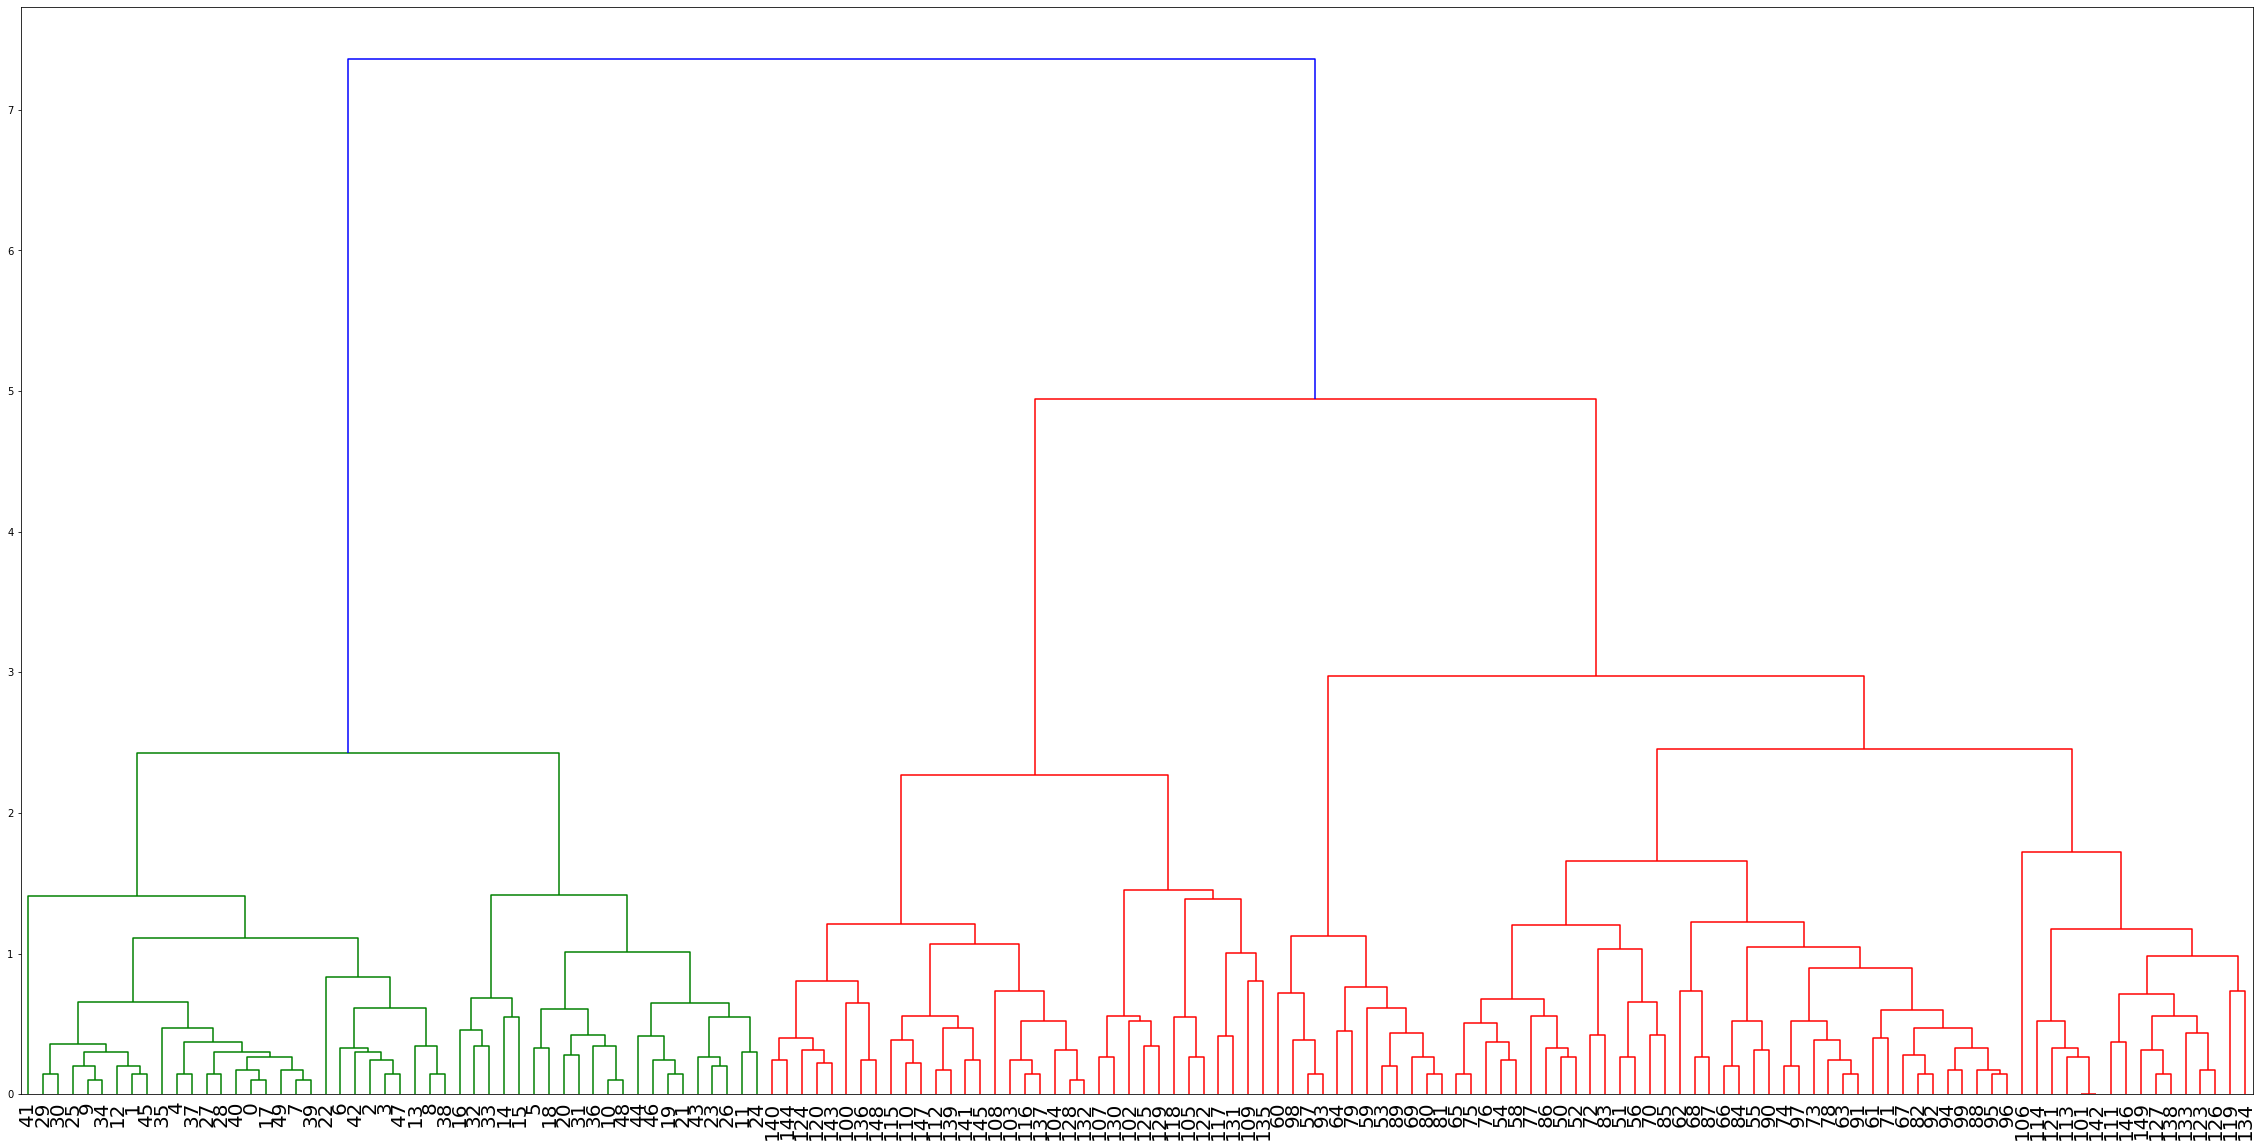

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(data, method='complete')

plt.figure(figsize=(40, 20))
dendrogram(mergings, 
           #labels = labels.as_matrix(columns=['labels']),
           leaf_rotation = 90, 
           leaf_font_size = 20,
)
plt.show()

Cross tabulazation

In [11]:
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(mergings, 3, criterion = 'distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'], labels['labels'])
print(ct)

labels    0   1   2
predict            
1        50   0   0
2         0   0  34
3         0  50  16
